In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
X = dataset.iloc[:, [3, 4]].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
n_clusters = 5  # Set the desired number of clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(X_scaled)

C:\Anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
supervised = dataset.copy()
supervised['Cluster_group'] = y_spectral

In [7]:
supervised.to_csv("cluster_spectral.csv", index=False)

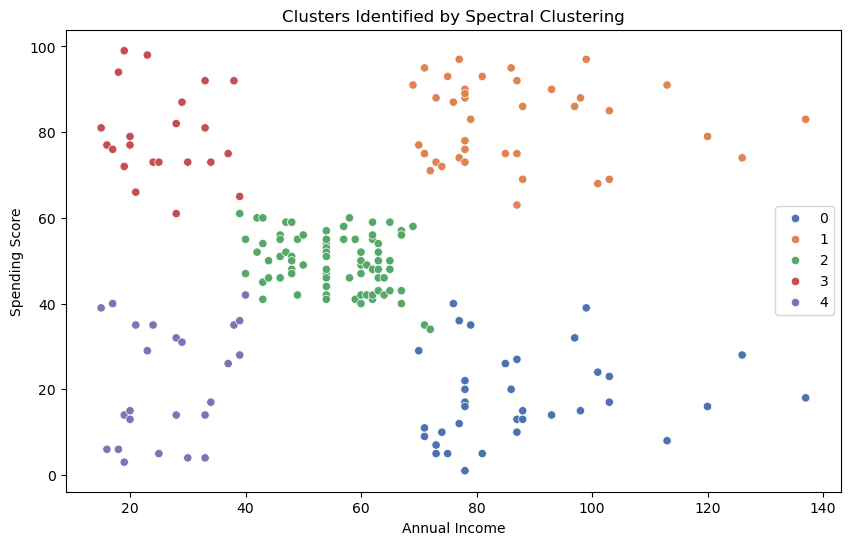

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue='Cluster_group', palette='deep')
plt.title('Clusters Identified by Spectral Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()